In [1]:
# Import necessary libraries
import pandas as pd

In [2]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [3]:
# Load the dataset into a Pandas DataFrame
from pycaret.datasets import get_data
df=get_data('seeds')

# Display the first few rows of the DataFrame
print(df.head())


,area,perimeter,compactness,length,width,asymmetry,length.1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


    area  perimeter  compactness  length  width  asymmetry  length.1
0  15.26      14.84       0.8710   5.763  3.312      2.221     5.220
1  14.88      14.57       0.8811   5.554  3.333      1.018     4.956
2  14.29      14.09       0.9050   5.291  3.337      2.699     4.825
3  13.84      13.94       0.8955   5.324  3.379      2.259     4.805
4  16.14      14.99       0.9034   5.658  3.562      1.355     5.175


In [4]:
# import pycaret clustering and init setup
from pycaret.clustering import *


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4030,275.5166,0.8609,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

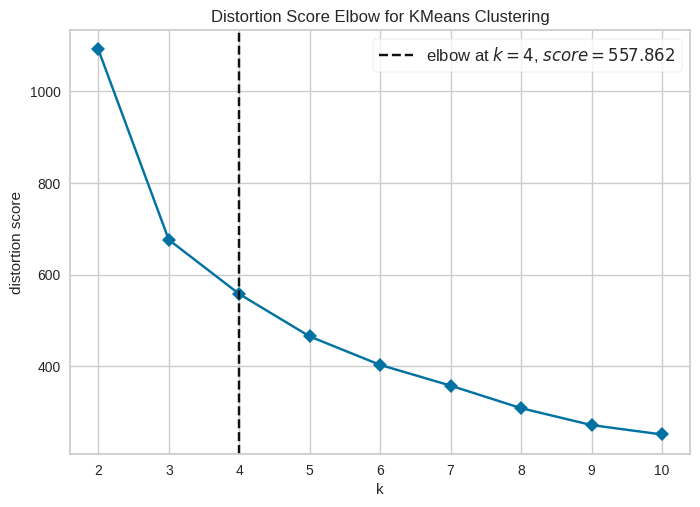

In [5]:

setup(data = df, verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [6]:
setup(data=df,verbose=False)
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3974,164.6173,0.8704,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

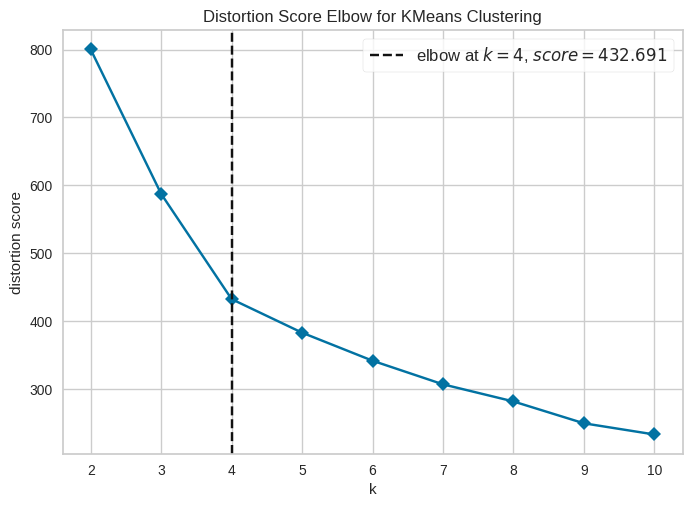

In [7]:
setup(data = df, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [8]:
models=['kmeans','sc','hclust','birch']
Scores=['Silhouette','Calinski-Harabasz','Davies-Bouldin']
modelNames=['K-Means clustering','Spectral Clustering','Agglomerative Clustering','Birch Clustering']
clusters = [3,4,5]
for i in range(len(modelNames)):
  result=pd.DataFrame()
  result['Parameters']=Scores
  setup(data=df,verbose=False)
  for j in clusters:
    print('Number of Clusters =',j)
    model=create_model(models[i],num_clusters=j)
    r=pull()
    result['None_'+str(j)]=[round(float(r['Silhouette']),2),round(float(r['Calinski-Harabasz']),2),round(float(r['Davies-Bouldin']),2)]
  setup(data=df,normalize=True,normalize_method='zscore',verbose=False)
  for j in clusters:
    print('Number of Clusters =',j)
    model=create_model(models[i],num_clusters=j)
    r=pull()
    result['Norm_'+str(j)]=[round(float(r['Silhouette']),2),round(float(r['Calinski-Harabasz']),2),round(float(r['Davies-Bouldin']),2)]
  setup(data=df,transformation=True,transformation_method='yeo-johnson',verbose=False)
  for j in clusters:
    print('Number of Clusters =',j)
    model=create_model(models[i],num_clusters=j)
    r=pull()
    result['T_'+str(j)]=[round(float(r['Silhouette']),2),round(float(r['Calinski-Harabasz']),2),round(float(r['Davies-Bouldin']),2)]
  setup(data=df,pca=True,pca_method='linear',verbose=False)
  for j in clusters:
    print('Number of Clusters =',j)
    model=create_model(models[i],num_clusters=j)
    r=pull()
    result['PCA_'+str(j)]=[round(float(r['Silhouette']),2),round(float(r['Calinski-Harabasz']),2),round(float(r['Davies-Bouldin']),2)]
  setup(data=df,transformation=True,transformation_method='yeo-johnson',normalize=True,normalize_method='zscore',verbose=False)
  for j in clusters:
    print('Number of Clusters =',j)
    model=create_model(models[i],num_clusters=j)
    r=pull()
    result['T+N_'+str(j)]=[round(float(r['Silhouette']),2),round(float(r['Calinski-Harabasz']),2),round(float(r['Davies-Bouldin']),2)]
  setup(data=df,transformation=True,normalize=True,pca=True,normalize_method='zscore',transformation_method ='yeo-johnson',pca_method='linear',verbose=False)
  for j in clusters:
    print('Number of Clusters =',j)
    model=create_model(models[i],num_clusters=j)
    r=pull()
    result['T+N+PCA_'+str(j)]=[round(float(r['Silhouette']),2),round(float(r['Calinski-Harabasz']),2),round(float(r['Davies-Bouldin']),2)]
  result.to_csv(modelNames[i]+'.csv',index=False)

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4540,324.4954,0.7987,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4030,275.5166,0.8609,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3622,256.9547,0.9701,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3854,155.4493,1.0248,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3974,164.6173,0.8704,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3307,145.2847,1.0068,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5234,492.8330,0.5664,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5343,653.3190,0.5415,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5207,736.6037,0.5515,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4540,324.4955,0.7987,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4015,275.8480,0.9174,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3622,256.9546,0.9701,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3960,196.5351,0.9848,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3332,153.3406,1.3865,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2947,132.7383,1.4023,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3960,196.5351,0.9848,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3563,153.4101,1.3442,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2817,132.0684,1.4367,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4749,165.8019,0.6756,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4599,234.9466,0.7277,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4087,192.8601,0.7164,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4442,129.5794,0.7979,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3953,163.9263,0.8737,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3831,130.2232,0.7951,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4749,165.8017,0.6756,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4599,234.9465,0.7277,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4105,196.2293,0.7178,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3926,194.8379,0.9954,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3145,149.2701,1.1487,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2800,114.5908,1.0255,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3926,194.8379,0.9954,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3145,149.2701,1.1487,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2889,119.2376,1.0348,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4066,253.3362,0.8383,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3914,256.1088,0.9231,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3734,231.3251,0.9811,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3794,144.0080,1.1210,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3624,149.0120,0.8866,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3006,132.3875,1.0281,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5064,438.9553,0.5312,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5129,608.5274,0.5506,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4994,630.6559,0.5332,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4066,253.3361,0.8383,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3914,256.1087,0.9231,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3734,231.3250,0.9811,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3822,188.0839,1.0136,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3870,149.2392,1.3004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3590,125.5824,1.0750,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3822,188.0838,1.0136,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3870,149.2392,1.3004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3590,125.5824,1.0750,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3916,255.4883,0.8948,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3531,255.7885,0.9711,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3597,217.2995,0.8591,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4445,130.7723,0.8044,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3716,154.6169,0.8913,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3708,127.9960,0.7571,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5064,438.9553,0.5312,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5129,608.5274,0.5506,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4994,630.6559,0.5332,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3916,255.4882,0.8948,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3531,255.7884,0.9711,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3597,217.2993,0.8591,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3384,167.4500,1.0354,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3510,130.4972,1.0740,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2875,119.7726,1.2161,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3384,167.4500,1.0354,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3510,130.4972,1.0740,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2875,119.7726,1.2161,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
models=['ap','meanshift','dbscan','optics']
Scores=['Silhouette','Calinski-Harabasz','Davies-Bouldin']
modelNames=['Affinity Propagation','Mean shift clustering','Density-Based Spatial Clustering','OPTICS Clustering']
for i in range(len(modelNames)):
  result=pd.DataFrame()
  result['Parameters']=Scores
  setup(data=df,verbose=False)
  print('Number of Clusters =',j)
  model=create_model(models[i])
  r=pull()
  result['None_'+str(j)]=[round(float(r['Silhouette']),2),round(float(r['Calinski-Harabasz']),2),round(float(r['Davies-Bouldin']),2)]
  setup(data=df,normalize=True,normalize_method='zscore',verbose=False)
  model=create_model(models[i],num_clusters=j)
  r=pull()
  result['Norm_'+str(j)]=[round(float(r['Silhouette']),2),round(float(r['Calinski-Harabasz']),2),round(float(r['Davies-Bouldin']),2)]
  setup(data=df,transformation=True,transformation_method='yeo-johnson',verbose=False)
  model=create_model(models[i],num_clusters=j)
  r=pull()
  result['T_'+str(j)]=[round(float(r['Silhouette']),2),round(float(r['Calinski-Harabasz']),2),round(float(r['Davies-Bouldin']),2)]
  setup(data=df,pca=True,pca_method='linear',verbose=False)
  model=create_model(models[i],num_clusters=j)
  r=pull()
  result['PCA_'+str(j)]=[round(float(r['Silhouette']),2),round(float(r['Calinski-Harabasz']),2),round(float(r['Davies-Bouldin']),2)]
  setup(data=df,transformation=True,transformation_method='yeo-johnson',normalize=True,normalize_method='zscore',verbose=False)
  model=create_model(models[i],num_clusters=j)
  r=pull()
  result['T+N_'+str(j)]=[round(float(r['Silhouette']),2),round(float(r['Calinski-Harabasz']),2),round(float(r['Davies-Bouldin']),2)]
  setup(data=df,transformation=True,normalize=True,pca=True,normalize_method='zscore',transformation_method ='yeo-johnson',pca_method='linear',verbose=False)
  model=create_model(models[i],num_clusters=j)
  r=pull()
  result['T+N+PCA_'+str(j)]=[round(float(r['Silhouette']),2),round(float(r['Calinski-Harabasz']),2),round(float(r['Davies-Bouldin']),2)]
  result.to_csv(modelNames[i]+'.csv',index=False)

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3140,221.2322,0.8715,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2350,108.4984,0.9599,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4601,953.9818,0.6245,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3140,221.2321,0.8715,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2335,93.4937,1.0091,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2335,93.4937,1.0091,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4724,93.4796,0.4805,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4401,74.5656,0.4598,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4724,93.4795,0.4805,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4115,62.2176,0.5382,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4115,62.2176,0.5382,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.2832,16.0052,1.6832,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3184,5.0309,2.4907,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.2832,16.0052,1.6832,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.2970,11.9816,1.9395,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3331,5.6163,2.1061,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0890,18.4796,6.0028,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.2970,11.9816,1.9395,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3054,8.7722,2.0785,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3054,8.7722,2.0785,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [17]:
    setup(data=df,transformation=True,transformation_method='yeo-johnson',verbose=False)
    KMeanClusteringModel = create_model('kmeans', num_clusters=4)
    plot_model(KMeanClusteringModel, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5343,653.3190,0.5415,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5343,653.3190,0.5415,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

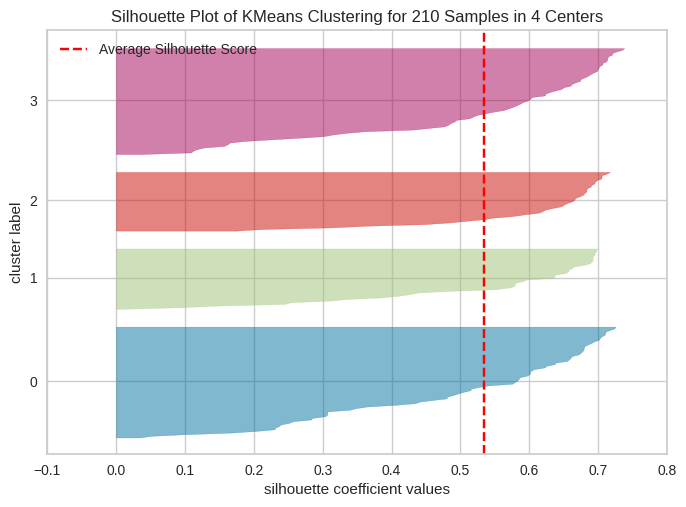

In [13]:
setup(data=df,transformation=True,transformation_method='yeo-johnson',verbose=False)
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
plot_model(KMeanClusteringModel, plot = 'silhouette')

In [20]:
setup(data=df,transformation=True,transformation_method='yeo-johnson',verbose=False)
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
plot_model(KMeanClusteringModel, plot = 'cluster')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5343,653.3190,0.5415,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [16]:
setup(data=df,transformation=True,transformation_method='yeo-johnson',verbose=False)
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
plot_model(KMeanClusteringModel, plot = 'distribution')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5343,653.3190,0.5415,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]